In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
os.chdir(r"C:\Users\Hp\Downloads")

In [5]:
bank=pd.read_excel("bank.xlsx", sheet_name="bank")

In [6]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Univariate Analysis 

In [8]:
def univariate_cat(data, x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    f1=pd.DataFrame(data[x].value_counts())
    f1.rename(columns={x:"Count"}, inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"percentage"}, inplace=True)
    f2["percentage"]=(f2["percentage"]*100).round(2).astype(str)+"%"
    ff=pd.concat([f1, f2], axis=1)
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print(f"Value count and %\n", ff)
    sns.countplot(data=data, x=x)
    plt.show()

In [9]:
bank.dtypes[bank.dtypes=="object"].index

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

Total missing values : 0

Total count of unique categories: 12

Unique categories :
['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']
Value count and %
                Count percentage
management      2566     22.99%
blue-collar     1944     17.42%
technician      1823     16.33%
admin.          1334     11.95%
services         923      8.27%
retired          778      6.97%
self-employed    405      3.63%
student          360      3.23%
unemployed       357       3.2%
entrepreneur     328      2.94%
housemaid        274      2.45%
unknown           70      0.63%


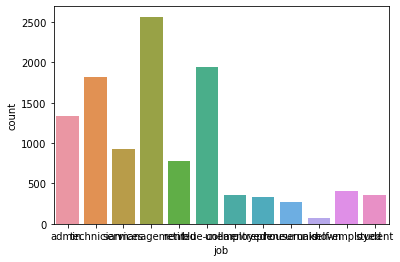

In [10]:
univariate_cat(data=bank, x="job") 

In [11]:
bank["job"]=bank["job"].replace(["management", "admin."], "White-collar")

bank["job"]=bank["job"].replace(["services", "housemaid"], "Pink-collar")

bank["job"]=bank["job"].replace(["retired", "student", "unemployed", 
                                   "unknown"], "Others")

bank["job"]=bank["job"].replace(["self-employed", "entrepreneur"], 
                                  "self-depend")

Total missing values : 0

Total count of unique categories: 6

Unique categories :
['White-collar', 'technician', 'Pink-collar', 'Others', 'blue-collar', 'self-depend']
Value count and %
               Count percentage
White-collar   3900     34.94%
blue-collar    1944     17.42%
technician     1823     16.33%
Others         1565     14.02%
Pink-collar    1197     10.72%
self-depend     733      6.57%


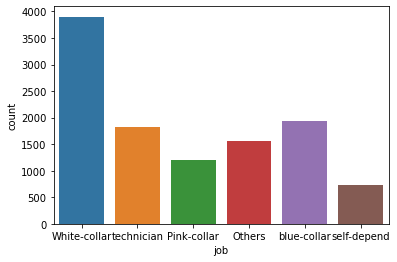

In [12]:
univariate_cat(data=bank, x="job") 

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['married', 'single', 'divorced']
Value count and %
           Count percentage
married    6351      56.9%
single     3518     31.52%
divorced   1293     11.58%


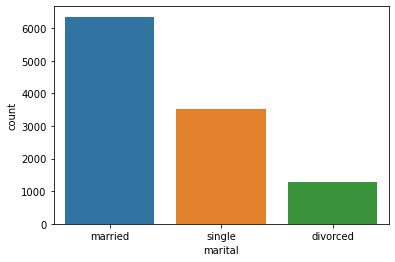

In [13]:
univariate_cat(data=bank, x="marital")

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['secondary', 'tertiary', 'primary', 'unknown']
Value count and %
            Count percentage
secondary   5476     49.06%
tertiary    3689     33.05%
primary     1500     13.44%
unknown      497      4.45%


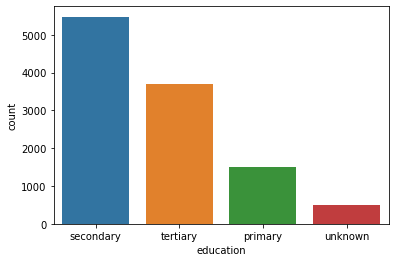

In [14]:
univariate_cat(data=bank, x="education")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
Value count and %
      Count percentage
no   10994     98.49%
yes    168      1.51%


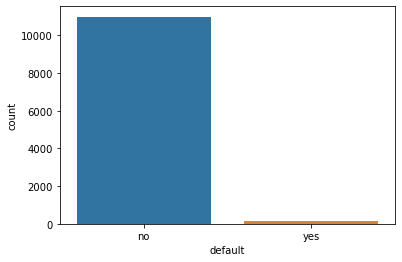

In [15]:
# 'default', 'housing', 'loan', 'contact','month', 'poutcome', 'deposit'
univariate_cat(data=bank, x="default")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
Value count and %
      Count percentage
no    5881     52.69%
yes   5281     47.31%


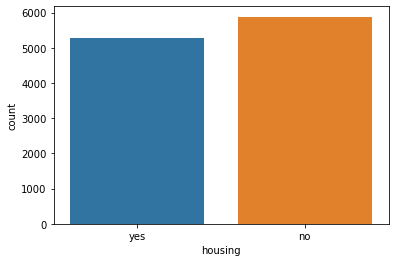

In [16]:
# 'housing', 'loan', 'contact','month', 'poutcome', 'deposit'
univariate_cat(data=bank, x="housing")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
Value count and %
      Count percentage
no    5881     52.69%
yes   5281     47.31%


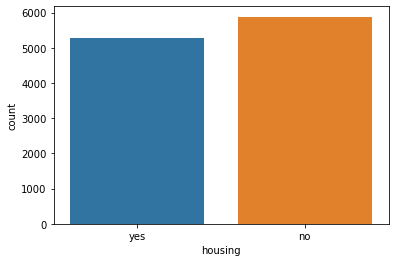

In [17]:
# 'loan', 'contact','month', 'poutcome', 'deposit'
univariate_cat(data=bank, x="housing")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
Value count and %
      Count percentage
no    9702     86.92%
yes   1460     13.08%


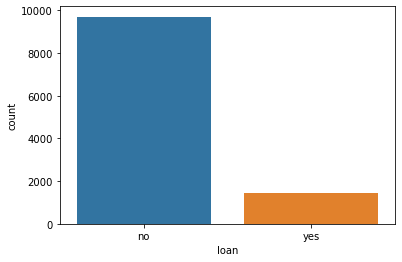

In [18]:
# 'loan', 'contact','month', 'poutcome', 'deposit'
univariate_cat(data=bank, x="loan")

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['unknown', 'cellular', 'telephone']
Value count and %
            Count percentage
cellular    8042     72.05%
unknown     2346     21.02%
telephone    774      6.93%


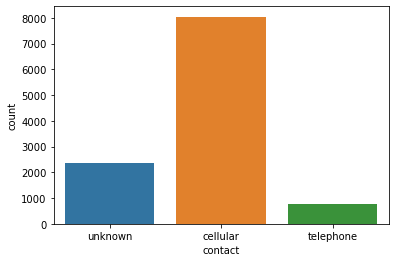

In [19]:
#  'contact','month', 'poutcome', 'deposit'
univariate_cat(data=bank, x="contact")

In [20]:
bank[bank["contact"]=="cellular"] 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
367,28,blue-collar,single,secondary,no,-127,yes,no,cellular,4,jul,1044,3,-1,0,unknown,yes
368,55,blue-collar,married,secondary,no,49,yes,no,cellular,7,jul,494,4,-1,0,unknown,yes
369,51,technician,married,secondary,no,216,no,no,cellular,7,jul,615,2,-1,0,unknown,yes
370,39,technician,single,secondary,no,506,yes,no,cellular,7,jul,718,2,-1,0,unknown,yes
371,42,blue-collar,divorced,primary,no,213,yes,no,cellular,7,jul,434,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [21]:
bank.drop(columns=["contact"], inplace=True)

Total missing values : 0

Total count of unique categories: 12

Unique categories :
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']
Value count and %
      Count percentage
may   2824      25.3%
aug   1519     13.61%
jul   1514     13.56%
jun   1222     10.95%
nov    943      8.45%
apr    923      8.27%
feb    776      6.95%
oct    392      3.51%
jan    344      3.08%
sep    319      2.86%
mar    276      2.47%
dec    110      0.99%


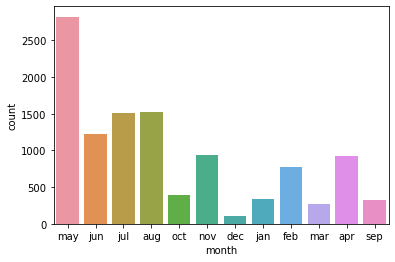

In [22]:
#  'month', 'poutcome', 'deposit'
univariate_cat(data=bank, x="month")

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['unknown', 'other', 'failure', 'success']
Value count and %
          Count percentage
unknown   8326     74.59%
failure   1228      11.0%
success   1071       9.6%
other      537      4.81%


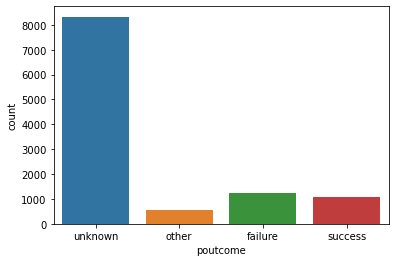

In [23]:
#  'poutcome', 'deposit'
univariate_cat(data=bank, x="poutcome")

In [24]:
bank["poutcome"]=bank["poutcome"].replace(["unknown", "other"], "other")

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['other', 'failure', 'success']
Value count and %
          Count percentage
other     8863      79.4%
failure   1228      11.0%
success   1071       9.6%


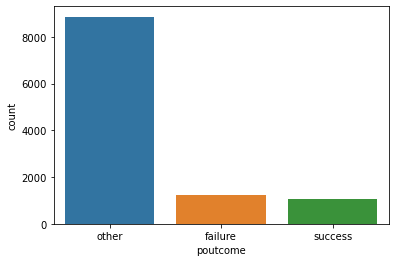

In [25]:
#  'poutcome', 'deposit'
univariate_cat(data=bank, x="poutcome")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
Value count and %
      Count percentage
no    5873     52.62%
yes   5289     47.38%


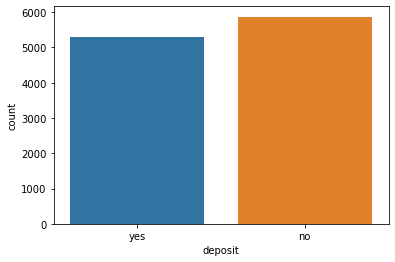

In [26]:
#  'deposit'
univariate_cat(data=bank, x="deposit")

In [27]:
bank["deposit"]=bank["deposit"].map({"yes":1, "no":0})

In [28]:
bank["deposit"].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [29]:
bank["deposit"].dtypes

dtype('int64')

### univariate on Numericals

In [30]:
 def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

In [31]:
bank.dtypes[bank.dtypes!="object"].index

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')

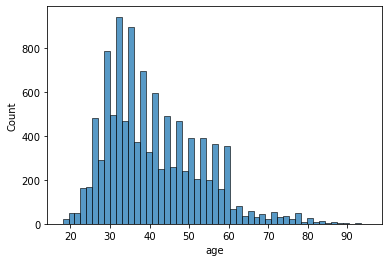

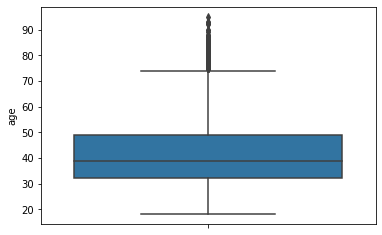

{'missing': 0,
 'min': 18,
 'max': 95,
 'mean': 41.23,
 'var': 141.93,
 'std': 11.91,
 'range': 77,
 'q1': 32.0,
 'q2': 39.0,
 'q3': 49.0,
 'skewness': 0.86,
 'kurtosis': 0.62}

In [32]:
#['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','deposit']
univariate_num(data=bank, x="age")

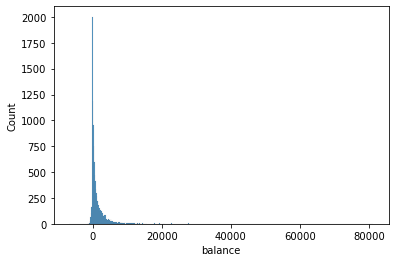

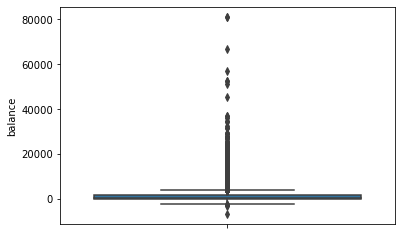

{'missing': 0,
 'min': -6847,
 'max': 81204,
 'mean': 1528.54,
 'var': 10403291.12,
 'std': 3225.41,
 'range': 88051,
 'q1': 122.0,
 'q2': 550.0,
 'q3': 1708.0,
 'skewness': 8.22,
 'kurtosis': 126.86}

In [33]:
#['balance', 'day', 'duration', 'campaign', 'pdays', 'previous','deposit']
univariate_num(data=bank, x="balance")

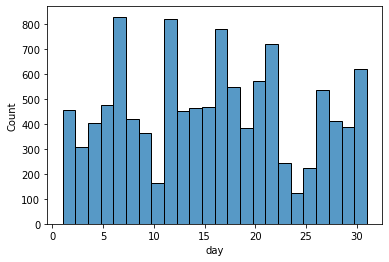

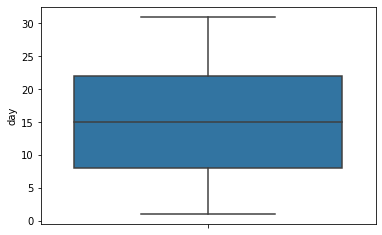

{'missing': 0,
 'min': 1,
 'max': 31,
 'mean': 15.66,
 'var': 70.91,
 'std': 8.42,
 'range': 30,
 'q1': 8.0,
 'q2': 15.0,
 'q3': 22.0,
 'skewness': 0.11,
 'kurtosis': -1.06}

In [34]:
#[ 'day', 'duration', 'campaign', 'pdays', 'previous','deposit']
univariate_num(data=bank, x="day")

In [35]:
bank.drop(columns=["day"], inplace=True)

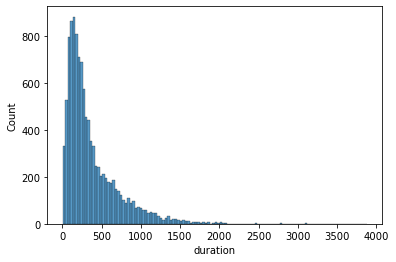

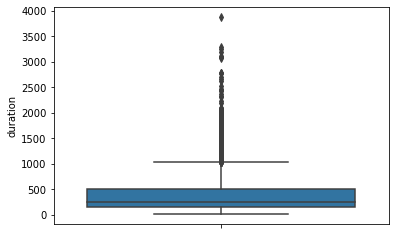

{'missing': 0,
 'min': 2,
 'max': 3881,
 'mean': 371.99,
 'var': 120498.12,
 'std': 347.13,
 'range': 3879,
 'q1': 138.0,
 'q2': 255.0,
 'q3': 496.0,
 'skewness': 2.14,
 'kurtosis': 7.3}

In [36]:
#[ 'duration', 'campaign', 'pdays', 'previous','deposit']
univariate_num(data=bank, x="duration")

In [37]:
3500/60

58.333333333333336

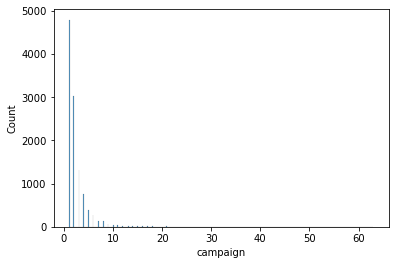

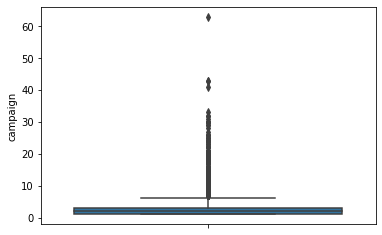

{'missing': 0,
 'min': 1,
 'max': 63,
 'mean': 2.51,
 'var': 7.41,
 'std': 2.72,
 'range': 62,
 'q1': 1.0,
 'q2': 2.0,
 'q3': 3.0,
 'skewness': 5.55,
 'kurtosis': 57.39}

In [38]:
#[  'campaign', 'pdays', 'previous','deposit']
univariate_num(data=bank, x="campaign")

<AxesSubplot:xlabel='campaign', ylabel='count'>

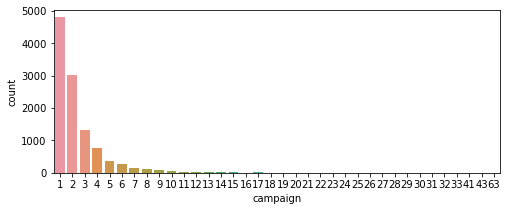

In [39]:
plt.figure(figsize=(8,3))
sns.countplot(data=bank, x="campaign")

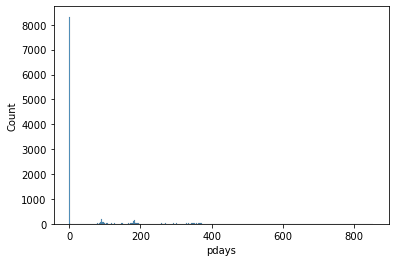

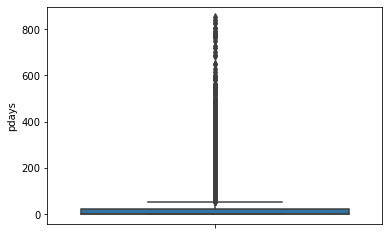

{'missing': 0,
 'min': -1,
 'max': 854,
 'mean': 51.33,
 'var': 11828.36,
 'std': 108.76,
 'range': 855,
 'q1': -1.0,
 'q2': -1.0,
 'q3': 20.75,
 'skewness': 2.45,
 'kurtosis': 6.84}

In [40]:
#[   'pdays', 'previous','deposit']
univariate_num(data=bank, x="pdays")

<AxesSubplot:xlabel='pdays', ylabel='count'>

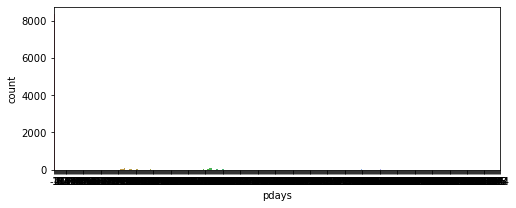

In [41]:
plt.figure(figsize=(8,3))
sns.countplot(data=bank, x="pdays")

In [42]:
bank["pdays"].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: pdays, Length: 472, dtype: int64

In [43]:
bank.loc[bank["pdays"]==-1,"pdays"]=999
bank["recent_pdays"]=1/bank["pdays"]
bank.drop(columns=["pdays"], inplace=True)

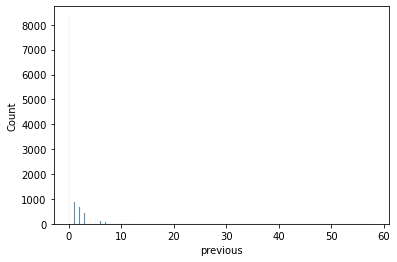

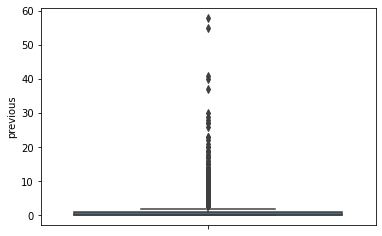

{'missing': 0,
 'min': 0,
 'max': 58,
 'mean': 0.83,
 'var': 5.25,
 'std': 2.29,
 'range': 58,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 1.0,
 'skewness': 7.34,
 'kurtosis': 106.2}

In [44]:
#[  'previous','deposit']
univariate_num(data=bank, x="previous")

## Bivariate Analysis 

In [45]:
# cat-cat 
# cat-num
# num-num

In [46]:
pd.crosstab(bank["job"], bank["deposit"])

deposit,0,1
job,,
Others,544,1021
Pink-collar,719,478
White-collar,1968,1932
blue-collar,1236,708
self-depend,423,310
technician,983,840


In [47]:
pd.crosstab(bank["job"], bank["deposit"], normalize="index")

deposit,0,1
job,,
Others,0.347604,0.652396
Pink-collar,0.600668,0.399332
White-collar,0.504615,0.495385
blue-collar,0.635802,0.364198
self-depend,0.577080,0.422920
technician,0.539221,0.460779


In [48]:
bank.dtypes[bank.dtypes=="object"].index

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'poutcome'],
      dtype='object')

In [49]:
#'marital', 'education', 'default', 'housing', 'loan', 'month','poutcome'
pd.crosstab(bank["marital"], bank["deposit"], normalize="index")

deposit,0,1
marital,,
divorced,0.518948,0.481052
married,0.566210,0.433790
single,0.456509,0.543491


In [50]:
#'education', 'default', 'housing', 'loan', 'month','poutcome'
pd.crosstab(bank["education"], bank["deposit"], normalize="index")

deposit,0,1
education,,
primary,0.606000,0.394000
secondary,0.552593,0.447407
tertiary,0.458932,0.541068
unknown,0.492958,0.507042


In [51]:
#'default', 'housing', 'loan', 'month','poutcome'
pd.crosstab(bank["default"], bank["deposit"], normalize="index")

deposit,0,1
default,,
no,0.523649,0.476351
yes,0.690476,0.309524


In [52]:
#'housing', 'loan', 'month','poutcome'
pd.crosstab(bank["housing"], bank["deposit"], normalize="index")

deposit,0,1
housing,,
no,0.429689,0.570311
yes,0.633592,0.366408


In [53]:
#'loan', 'month','poutcome'
pd.crosstab(bank["loan"], bank["deposit"], normalize="index")

deposit,0,1
loan,,
no,0.504741,0.495259
yes,0.668493,0.331507


In [54]:
#'month','poutcome'
pd.crosstab(bank["month"], bank["deposit"])

deposit,0,1
month,,
apr,346,577
aug,831,688
dec,10,100
feb,335,441
jan,202,142
jul,887,627
jun,676,546
mar,28,248
may,1899,925


In [55]:
pd.crosstab(bank["month"], bank["deposit"], normalize="all")

deposit,0,1
month,,
apr,0.030998,0.051693
aug,0.074449,0.061638
dec,0.000896,0.008959
feb,0.030013,0.039509
jan,0.018097,0.012722
jul,0.079466,0.056173
jun,0.060563,0.048916
mar,0.002509,0.022218
may,0.170131,0.082870


In [56]:
pd.crosstab(bank['poutcome'], bank["deposit"])

deposit,0,1
poutcome,,
failure,610,618
other,5170,3693
success,93,978


In [57]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'duration', 'campaign', 'previous', 'poutcome',
       'deposit', 'recent_pdays'],
      dtype='object')

### Cat-Num

In [58]:
bank.groupby(["deposit"]).agg({"age":["min", "mean", "median","max", "std", "count"]})

age                                       
        min       mean median max        std count
deposit                                           
0        18  40.837391   39.0  89  10.264815  5873
1        18  41.670070   38.0  95  13.497781  5289

<AxesSubplot:xlabel='deposit'>

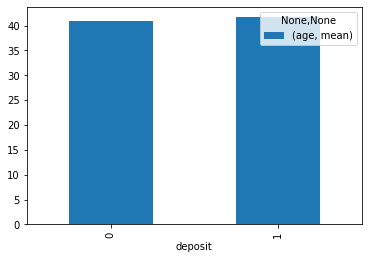

In [59]:
bank.groupby(["deposit"]).agg({"age":["mean"]}).plot(kind="bar")

In [60]:
from scipy import stats

In [61]:
# Null hypo : avg_age_(non deposit)= avg_age_(deposit)
# Alter hypo: avg_age_(non deposit) != avg_age_(deposit)
# Tests : two sample t test
# CI : 95%
# Alpha : 0.05
# Decision Rule :
#     if p value >= Alpha : Null is accepted 
#         p value < alpha : Null is rejected and alternative is accepted 
    

In [62]:
dp=bank[bank["deposit"]==1]
ndp=bank[bank["deposit"]==0]

In [63]:
stats.ttest_ind(dp["age"], ndp["age"])

Ttest_indResult(statistic=3.6892130272779955, pvalue=0.00022601800590796526)

In [64]:
bank.groupby(["deposit"]).agg({"balance":["min", "mean", "median","max", "std", "count"]})

balance                                              
            min         mean median    max          std count
deposit                                                      
0         -6847  1280.227141  414.0  66653  2933.411934  5873
1         -3058  1804.267915  733.0  81204  3501.104777  5289

In [65]:
stats.ttest_ind(dp["balance"], ndp["balance"]) 

Ttest_indResult(statistic=8.598842126021864, pvalue=9.126568254859532e-18)

In [66]:
# bank[bank["balance"]<=0]

In [67]:

bank.groupby(["deposit"]).agg({"duration":["min", "mean", "median","max", "std", "count"]})

duration                                           
             min        mean median   max         std count
deposit                                                    
0              2  223.130257  163.0  3284  208.577530  5873
1              8  537.294574  426.0  3881  392.525262  5289

In [68]:
stats.ttest_ind(dp["duration"], ndp["duration"]) 

Ttest_indResult(statistic=53.51796190607506, pvalue=0.0)

In [69]:
# Var         :   T test     :   Feature selection method     : Model variable impo
# Balance     :   Not Imp    :     Impo                       : Imp
# Age         :   imp        : Not imp                        : Imp
# edu         :  imp         : imp                            : imp 

## Num - Num

<AxesSubplot:xlabel='age', ylabel='balance'>

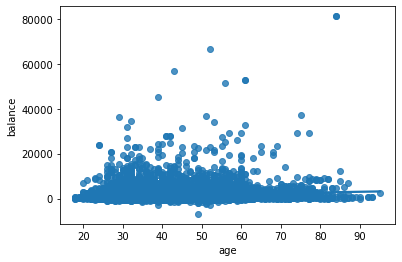

In [70]:
sns.regplot(data=bank, x="age", y="balance")


In [71]:
bank[["age", "balance"]].corr()

,age,balance
age,1.0000,0.1123
balance,0.1123,1.0000


<AxesSubplot:xlabel='age', ylabel='duration'>

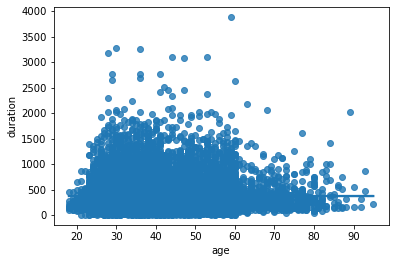

In [72]:
sns.regplot(data=bank, x="age", y="duration")

<AxesSubplot:xlabel='balance', ylabel='duration'>

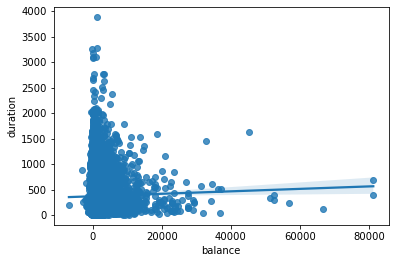

In [73]:
sns.regplot(data=bank, x="balance", y="duration")

In [74]:
import pandas_profiling as pp

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
profile = pp.ProfileReport(bank)
profile.to_file("output.html")

In [ ]:
profile

## Missing Value Treatment

In [ ]:
bank.isnull().sum()

***
* There is no missing value 
***

### Outlier Treatment

In [ ]:
sns.boxplot(data=bank, y="age")

In [ ]:
q1=bank["age"].quantile(.25)
q3=bank["age"].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

bank["age"]=np.where(bank["age"]>=upper_cap, upper_cap,bank["age"] )
bank["age"]=np.where(bank["age"]<=lower_cap, lower_cap, bank["age"])


In [ ]:
sns.boxplot(data=bank, y="age")

In [ ]:
bank["balance"]=np.where(bank["balance"]<=0, 0, bank["balance"])

In [ ]:
# sns.boxplot(data=bank, y="balance")

In [ ]:
var="balance"
q1=bank[var].quantile(.25)
q3=bank[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

bank[var]=np.where(bank[var]>=upper_cap, upper_cap,bank[var] )
bank[var]=np.where(bank[var]<=lower_cap, lower_cap, bank[var])


In [ ]:
sns.boxplot(data=bank, y="balance")

<AxesSubplot:ylabel='duration'>

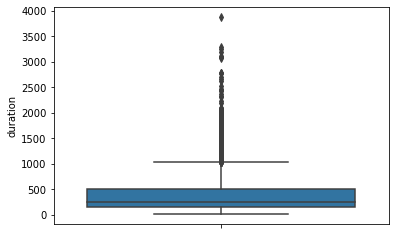

In [75]:
sns.boxplot(data=bank, y="duration")

In [76]:
var="duration"
q1=bank[var].quantile(.25)
q3=bank[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

bank[var]=np.where(bank[var]>=upper_cap, upper_cap,bank[var] )
bank[var]=np.where(bank[var]<=lower_cap, lower_cap, bank[var])

<AxesSubplot:ylabel='duration'>

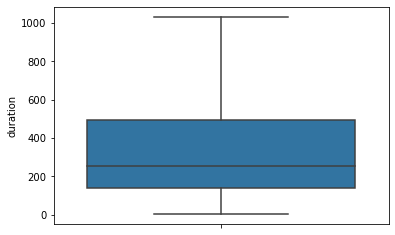

In [77]:
sns.boxplot(data=bank, y="duration")

In [78]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'duration', 'campaign', 'previous', 'poutcome',
       'deposit', 'recent_pdays'],
      dtype='object')

<AxesSubplot:ylabel='recent_pdays'>

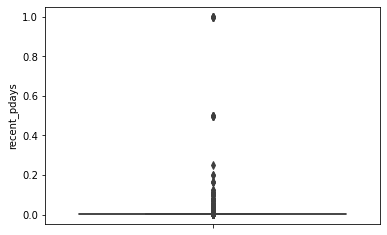

In [79]:
sns.boxplot(data=bank, y="recent_pdays")

In [80]:
var="recent_pdays"
q1=bank[var].quantile(.25)
q3=bank[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)
bank[var]=np.where(bank[var]>=upper_cap, upper_cap,bank[var] )
bank[var]=np.where(bank[var]<=lower_cap, lower_cap, bank[var])

<AxesSubplot:ylabel='recent_pdays'>

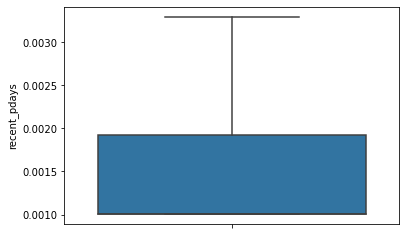

In [81]:
sns.boxplot(data=bank, y="recent_pdays")

### dummies

In [82]:
bank1=pd.get_dummies(data=bank, drop_first=True)

In [83]:
bank1.head(4)

,age,balance,duration,campaign,previous,deposit,recent_pdays,job_Pink-collar,job_White-collar,job_blue-collar,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,59,2343,1033.0,1,0,1,0.001001,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,56,45,1033.0,1,0,1,0.001001,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,41,1270,1033.0,1,0,1,0.001001,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,55,2476,579.0,1,0,1,0.001001,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [84]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,poutcome,deposit,recent_pdays
0,59,White-collar,married,secondary,no,2343,yes,no,may,1033.0,1,0,other,1,0.001001
1,56,White-collar,married,secondary,no,45,no,no,may,1033.0,1,0,other,1,0.001001
2,41,technician,married,secondary,no,1270,yes,no,may,1033.0,1,0,other,1,0.001001
3,55,Pink-collar,married,secondary,no,2476,yes,no,may,579.0,1,0,other,1,0.001001
4,54,White-collar,married,tertiary,no,184,no,no,may,673.0,2,0,other,1,0.001001


## Model development

In [85]:
x=bank1.drop(columns=["deposit"])
y=bank1["deposit"]

In [86]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3, random_state=0)

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

print("Train Accuracy :", round(dt.score(x_train, y_train),3))
print("Test Accuracy :", round(dt.score(x_test, y_test),3))

Train Accuracy : 1.0
Test Accuracy : 0.765


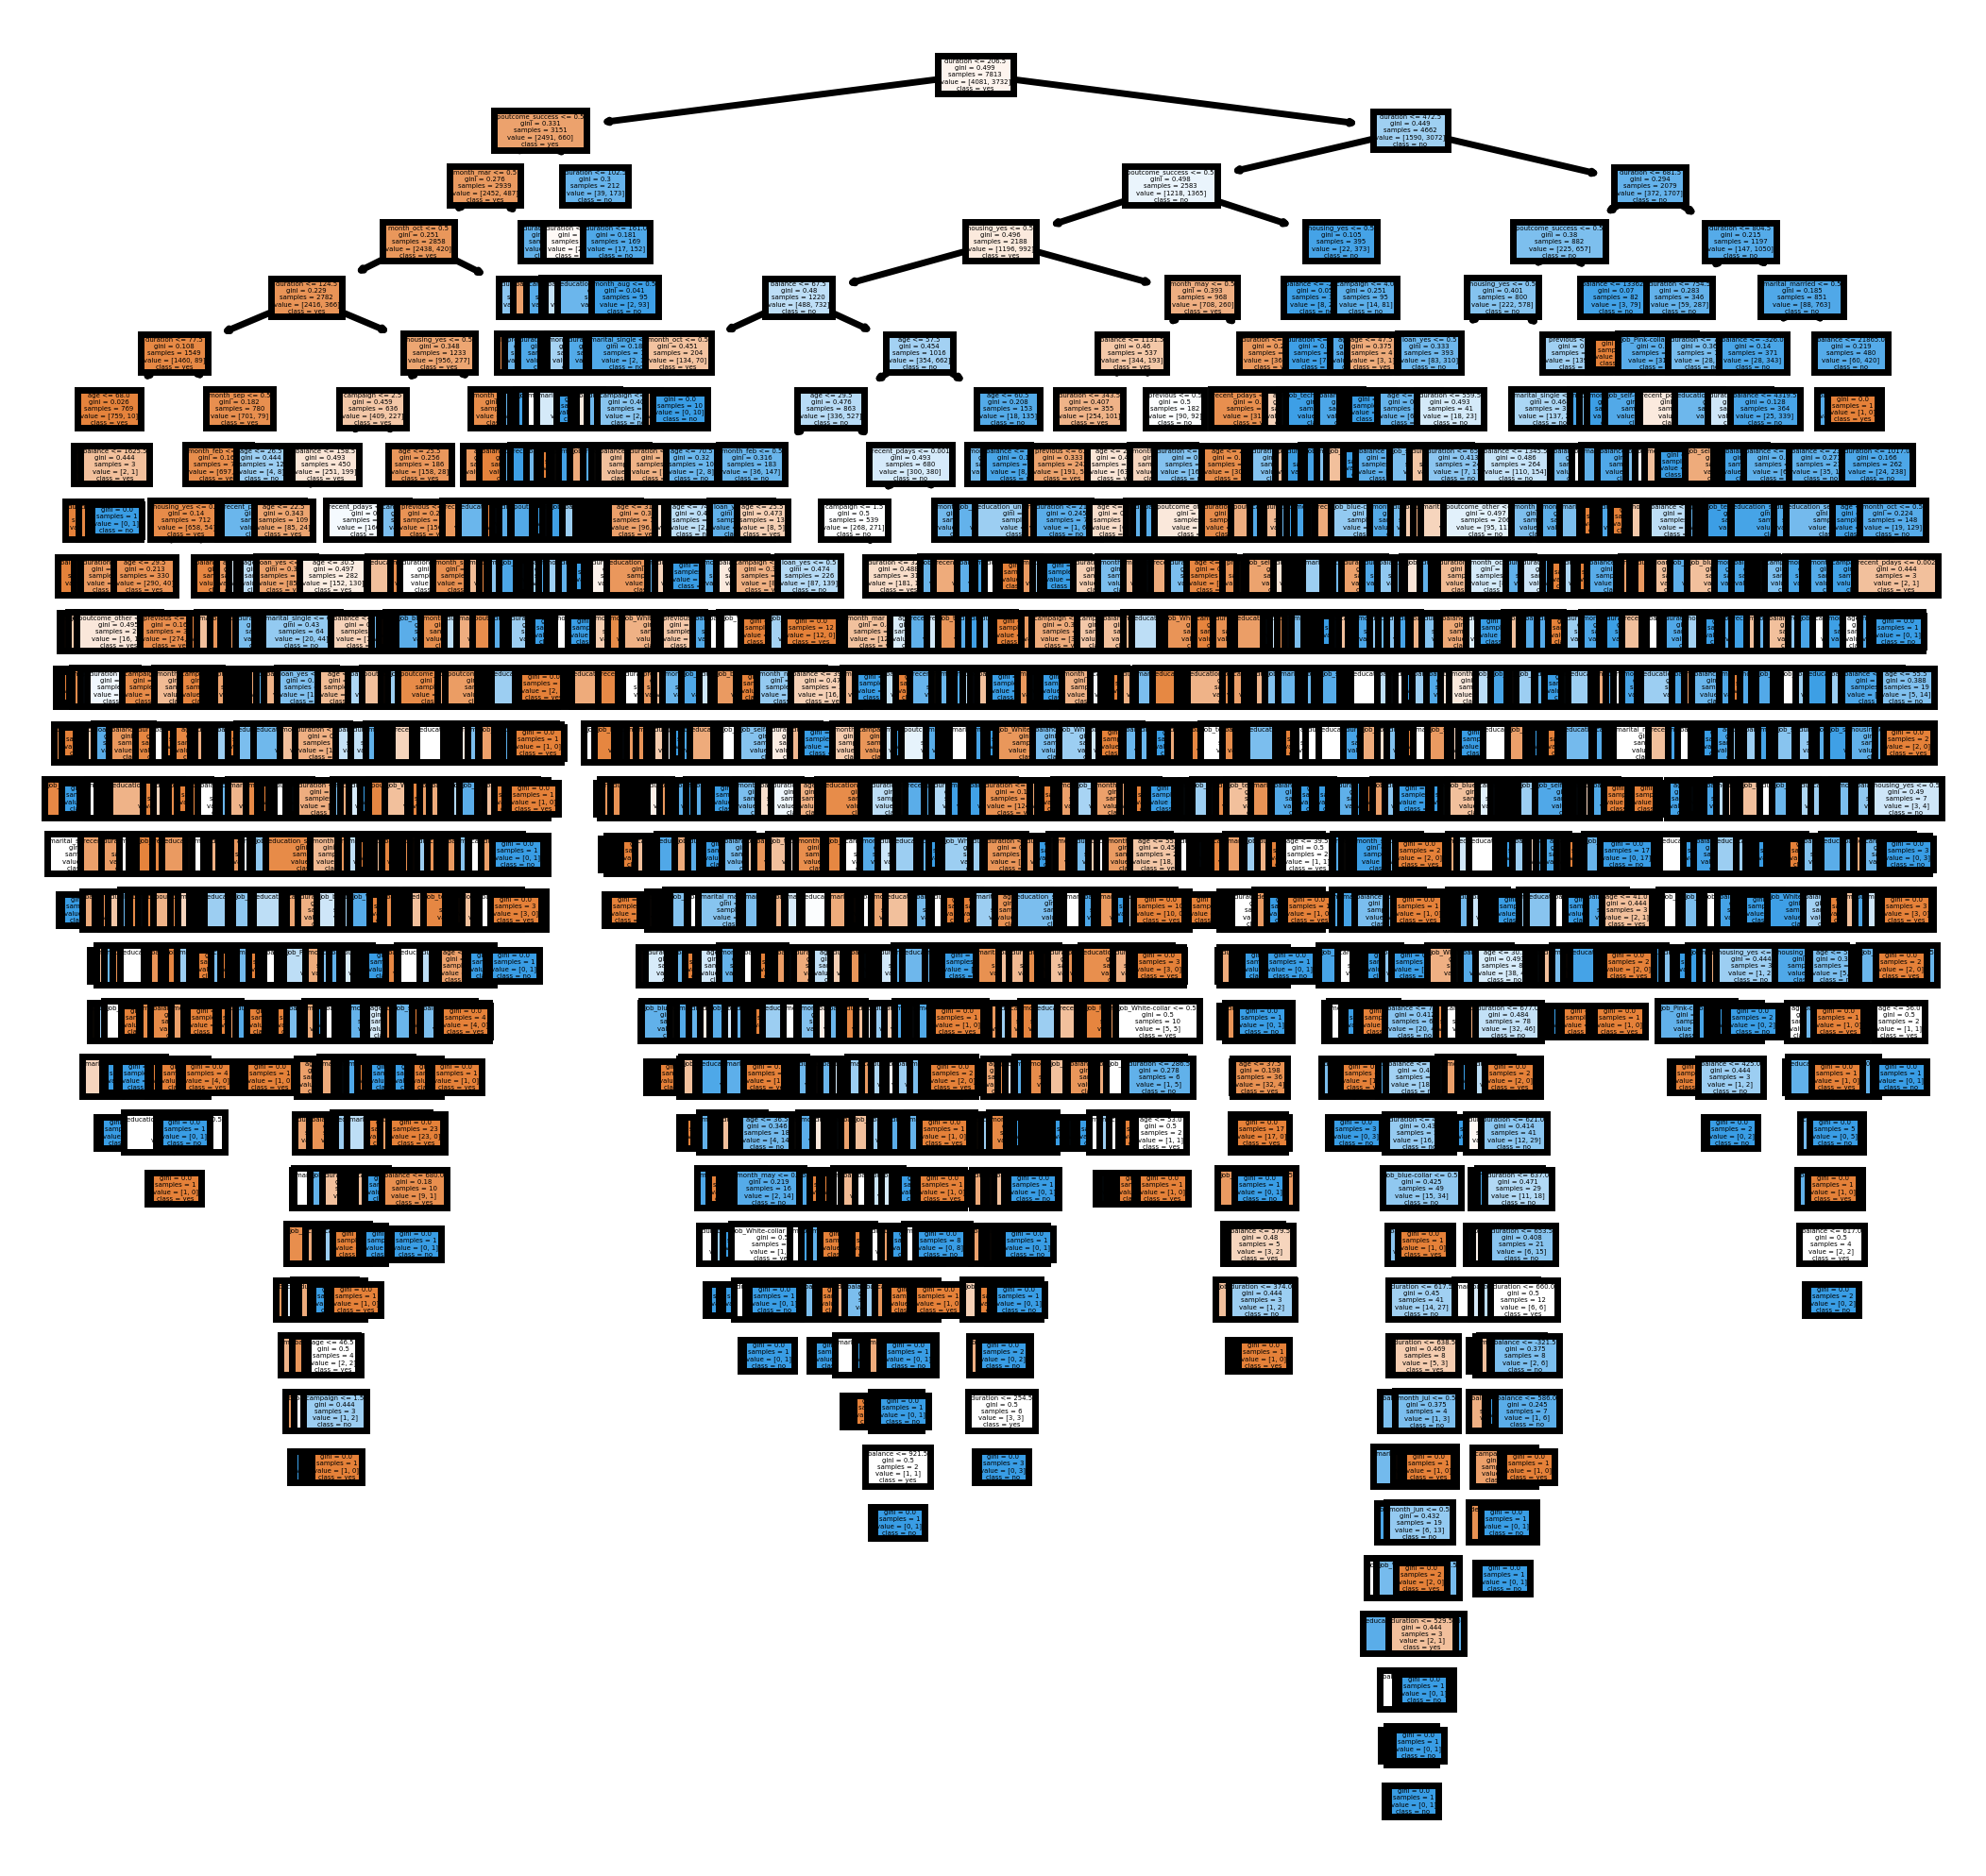

In [89]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=500)

dt_plot=plot_tree(dt,
           feature_names = fn, 
           class_names=cn,
           filled = True);

***
* Our model is overfitting as train results are far better that test
* To avoid overfitting : 
        make model simple ( control the parameters)
        Cross Validation 
***

In [90]:
dt1=DecisionTreeClassifier(max_depth=6)
dt1.fit(x_train, y_train)

print("Train Accuracy :", round(dt1.score(x_train, y_train),3))
print("Test Accuracy :", round(dt1.score(x_test, y_test),3))

Train Accuracy : 0.812
Test Accuracy : 0.799


In [91]:
dt1=DecisionTreeClassifier(min_samples_split=150)
dt1.fit(x_train, y_train)

print("Train Accuracy : "+str(round(dt1.score(x_train, y_train),3)*100)+str('%'))
print("Test Accuracy :"+str(round(dt1.score(x_test, y_test),3)*100)+str("%"))

Train Accuracy : 83.89999999999999%
Test Accuracy :81.2%


In [92]:
dt1=DecisionTreeClassifier(min_samples_leaf=50)
dt1.fit(x_train, y_train)

print("Train Accuracy : "+str(round(dt1.score(x_train, y_train),3)*100)+str('%'))
print("Test Accuracy :"+str(round(dt1.score(x_test, y_test),3)*100)+str("%"))

Train Accuracy : 82.89999999999999%
Test Accuracy :81.10000000000001%


In [93]:
dt1=DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train, y_train)

print("Train Accuracy : "+str(round(dt1.score(x_train, y_train),3)*100)+str('%'))
print("Test Accuracy :"+str(round(dt1.score(x_test, y_test),3)*100)+str("%"))

Train Accuracy : 100.0%
Test Accuracy :76.5%


In [94]:
dt1=DecisionTreeClassifier(criterion="gini")
dt1.fit(x_train, y_train)

print("Train Accuracy : "+str(round(dt1.score(x_train, y_train),3)*100)+str('%'))
print("Test Accuracy :"+str(round(dt1.score(x_test, y_test),3)*100)+str("%"))

Train Accuracy : 100.0%
Test Accuracy :76.7%


### Grid Search : Parameter tuning

In [ ]:
criterion=["gini", "entropy"]
max_depth=range(5,20,2)
min_sample_split=[10,15,20,50,100,200,250]
min_sample_leaf=[5,10,15,20,50,80,100]

In [215]:
2*8*7*7

784

In [ ]:
iter criterion  depth   split  leaf   Accuracy
0     gini       5        10    5       65%
1     gini        5       10    10      64%
2     gini       5        10    15      67%
3     gini       5        10    20      58%
4     gini       5        10    50      59%
5     gini       5        10    80     68%
5     gini       5        10    100    69%
5     gini       5        15    10    69%

In [217]:
from sklearn.model_selection import GridSearchCV

params={
    "criterion":["gini", "entropy"],
"max_depth": [5,7,9,10,11],
"min_samples_split" :[10,15,20,50,100,200,250],
"min_samples_leaf" : [5,10,15,20,50,80,100]}

dtg=DecisionTreeClassifier()

gd_search=GridSearchCV(estimator=dtg,param_grid=params , cv=10, n_jobs=-1, verbose=2)
gd_search.fit(x_train, y_train)

Fitting 10 folds for each of 490 candidates, totalling 4900 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 10, 11],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 80, 100],
                         'min_samples_split': [10, 15, 20, 50, 100, 200, 250]},
             verbose=2)

In [218]:
# cv : Cross Validation =10
# 10000  : 1000*10

In [219]:
gd_search.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 200}

In [220]:
gd_search.best_score_

0.8103164675100125

In [221]:
gd_search.best_estimator_

DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, min_samples_split=200)

In [226]:
# cv_res=pd.DataFrame(gd_search.cv_results_)
# cv_res.to_excel("cv.xlsx")

In [231]:
dt_f=DecisionTreeClassifier(criterion="gini",max_depth=11,
                            min_samples_leaf=5, 
                            min_samples_split=200)
dt_f.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, min_samples_split=200)

In [233]:
print("Train Accuracy : ", round(dt_f.score(x_train, y_train),3))
print("Test Accuracy :",round(dt_f.score(x_test, y_test),3))

Train Accuracy :  0.829
Test Accuracy : 0.806


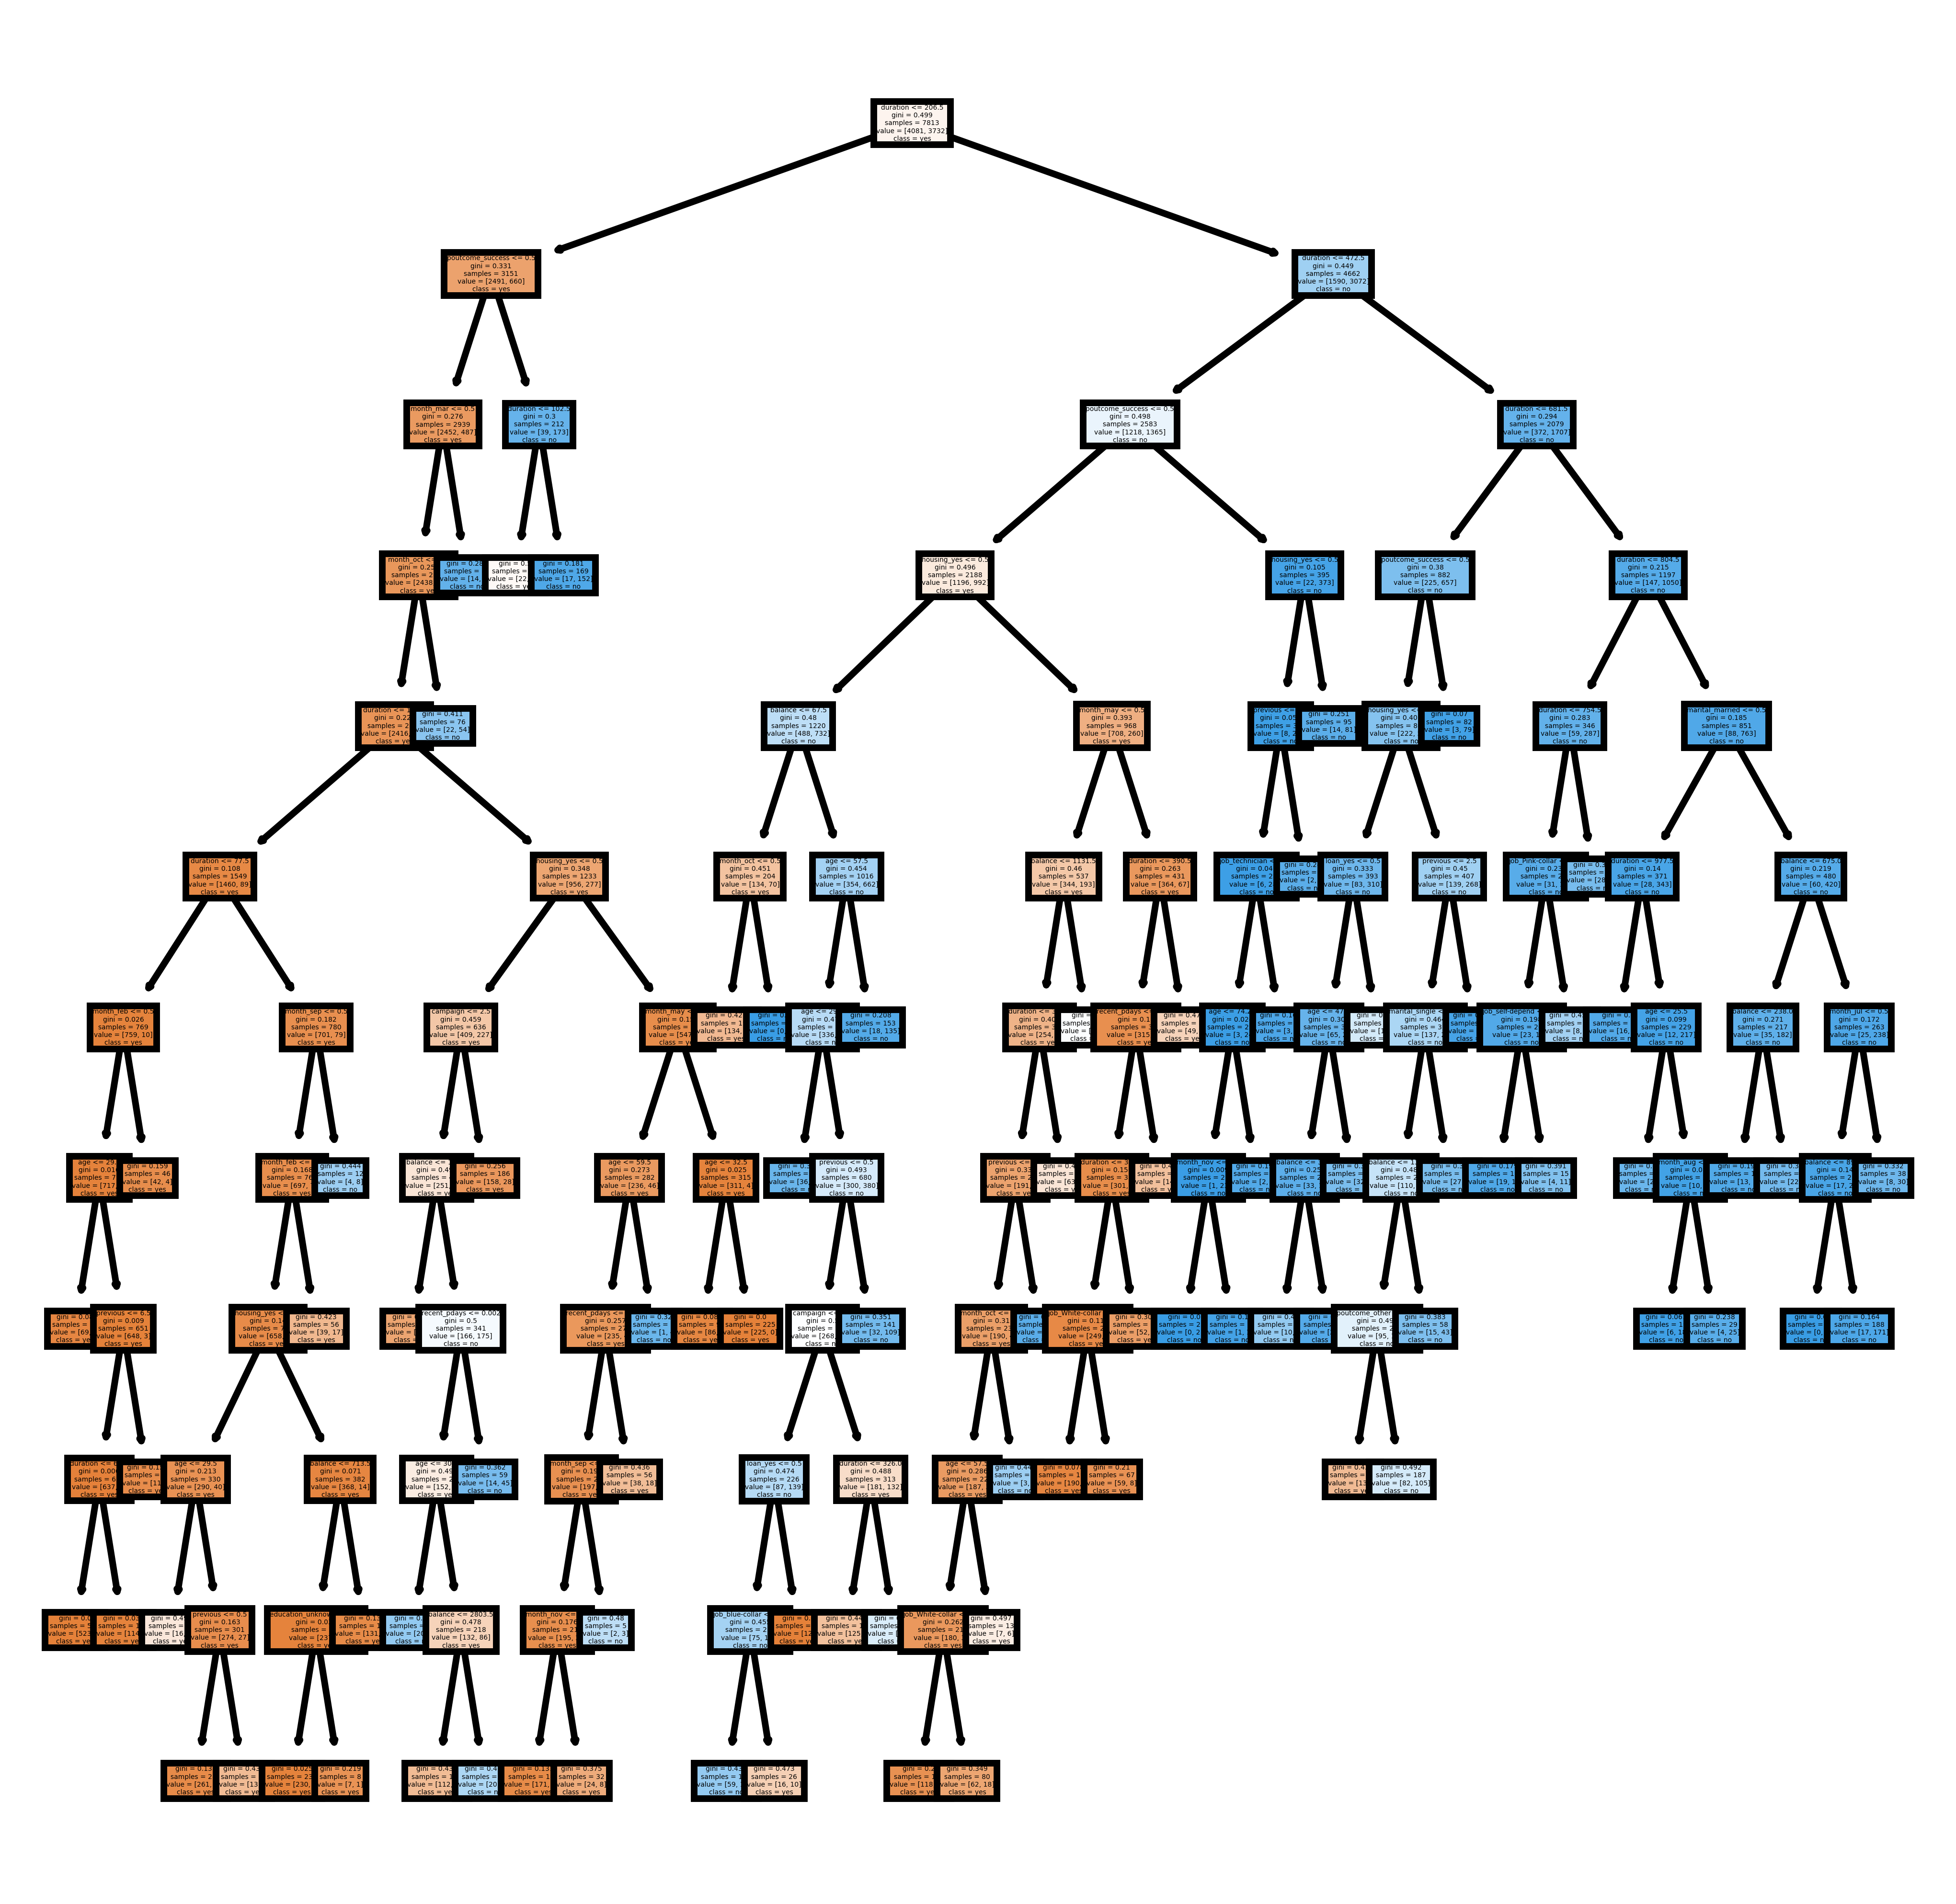

In [236]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=1000)

dt_plot=plot_tree(dt_f,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [239]:
from sklearn.tree import export_text
rules=export_text(dt_f, feature_names=x_train.columns.to_list())
print(rules)

|--- duration <= 206.50
|   |--- poutcome_success <= 0.50
|   |   |--- month_mar <= 0.50
|   |   |   |--- month_oct <= 0.50
|   |   |   |   |--- duration <= 124.50
|   |   |   |   |   |--- duration <= 77.50
|   |   |   |   |   |   |--- month_feb <= 0.50
|   |   |   |   |   |   |   |--- age <= 29.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- age >  29.50
|   |   |   |   |   |   |   |   |--- previous <= 6.50
|   |   |   |   |   |   |   |   |   |--- duration <= 68.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- duration >  68.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- previous >  6.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- month_feb >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- duration >  77.50
|   |   |   |   |   |   |--- month_sep <= 0.50
|   |   |   |   |   |   |   |--- month_feb <=

In [240]:
# duration <= 206.50 &poutcome_success <= 0.50 & month_mar <= 0.50 &duration <= 124.50 & duration <= 77.50 & month_feb <= 0.50 & age <= 29.50 
# duration <= 206.50 &poutcome_success <= 0.50 & month_mar <= 0.50 &duration <= 124.50 & duration <= 77.50 & month_feb <= 0.50 & age <= 29.50 

## Feature Importance

In [241]:
dt_f.feature_importances_

array([3.04047448e-02, 3.76839237e-02, 5.30434246e-01, 1.60569524e-02,
       1.52777845e-02, 7.66058404e-03, 1.15086729e-03, 9.38864459e-04,
       2.07131242e-03, 3.87681246e-04, 1.74062661e-04, 5.11903473e-04,
       2.26981070e-03, 0.00000000e+00, 0.00000000e+00, 9.69672847e-05,
       0.00000000e+00, 8.77278315e-02, 7.15005805e-03, 2.83788721e-04,
       0.00000000e+00, 2.95180012e-03, 0.00000000e+00, 5.90589018e-04,
       0.00000000e+00, 3.63431339e-02, 1.32754616e-02, 9.22607539e-04,
       3.13609773e-02, 5.11697508e-03, 1.03839281e-03, 1.68118679e-01])

In [244]:
feat_imp=pd.DataFrame({"Variable":x_train.columns,
             "Imp":dt_f.feature_importances_}).sort_values(by="Imp", ascending=False)

In [ ]:
feat_imp.head()

<AxesSubplot:xlabel='Variable', ylabel='Imp'>

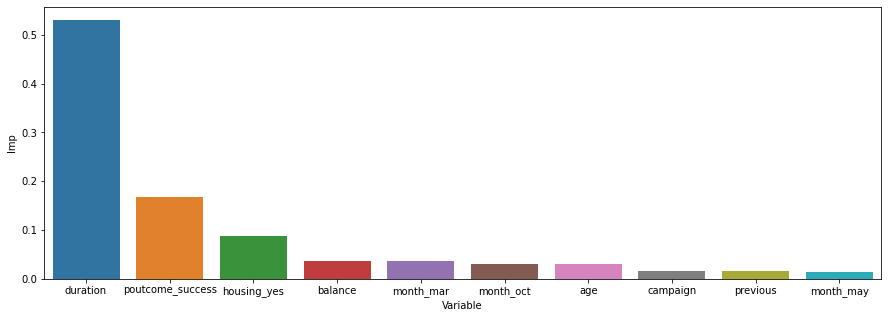

In [254]:
plt.figure(figsize=(15,5))
sns.barplot(data=feat_imp.head(10), x="Variable", y="Imp")

In [258]:
feat_imp[feat_imp["Imp"]>=0.01]["Variable"].unique()

array(['duration', 'poutcome_success', 'housing_yes', 'balance',
       'month_mar', 'month_oct', 'age', 'campaign', 'previous',
       'month_may'], dtype=object)

In [259]:
x_train1=x_train[['duration', 'poutcome_success', 'housing_yes', 'balance',
       'month_mar', 'month_oct', 'age', 'campaign', 'previous',
       'month_may']]

x_test1=x_test[['duration', 'poutcome_success', 'housing_yes', 'balance',
       'month_mar', 'month_oct', 'age', 'campaign', 'previous',
       'month_may']]

In [260]:
dt_f=DecisionTreeClassifier(criterion="gini",max_depth=11,
                            min_samples_leaf=5, 
                            min_samples_split=200)
dt_f.fit(x_train1, y_train)
print("Train Accuracy : ", round(dt_f.score(x_train1, y_train),3))
print("Test Accuracy :",round(dt_f.score(x_test1, y_test),3))

Train Accuracy :  0.825
Test Accuracy : 0.804


In [262]:
pred_train=dt_f.predict(x_train1)
pred_test=dt_f.predict(x_test1)

In [264]:
prob_train_1=dt_f.predict_proba(x_train1)[:,1]
prob_test_1=dt_f.predict_proba(x_test1)[:,1]

In [295]:
def classification_eva(act, pred, probs):
    ac1=metrics.accuracy_score(act, pred)
    rc1=metrics.recall_score(act, pred)
    pc1=metrics.precision_score(act, pred)
    f1=metrics.f1_score(act, pred)
    auc1=metrics.roc_auc_score(act, pred)
    result={"Accuracy":ac1, "Recall":rc1, "Precision":pc1, "F1 score":f1, "AUC":auc1}
    
    fpr, tpr, threshold=metrics.roc_curve(act,probs )
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show()
    return result

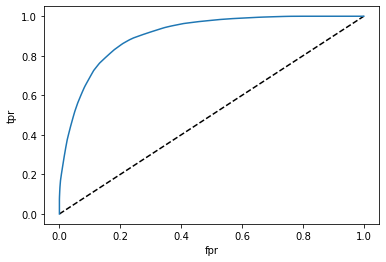

{'Accuracy': 0.8252911813643927,
 'Recall': 0.8555734190782422,
 'Precision': 0.7944762378701169,
 'F1 score': 0.8238936911366275,
 'AUC': 0.8265860234327747}

In [296]:
classification_eva(y_train, pred_train, probs=prob_train_1)

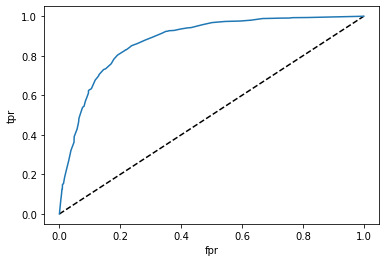

{'Accuracy': 0.8044192296207823,
 'Recall': 0.8265895953757225,
 'Precision': 0.7697368421052632,
 'F1 score': 0.7971508206875195,
 'AUC': 0.8058729226878613}

In [297]:
classification_eva(y_test, pred_test, probs=prob_test_1)

In [285]:
# profile_decile(x_train1,y_train,dt_f)